# Experimento

In [4]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

## Dataa sintetica

Optimization started
Processing epoch	373	0.0005	
Training time: 43.85s, epochs: 400

Least training loss reached: 0.000
ARI: 1.0
[1 1 2 0 0 1 2 2 2 2 0 1 0 2 2 2 0 0 0 0 2 1 1 1 2 0 0 0 2 2 1 1 2 0 0 1 1
 2 1 1 0 2 0 1 0 1 0 0 1 2 1 0 2 1 0 1 0 0 0 2 2 0 1 1 0 0 1 2 2 0 1 0 2 2
 2 1 2 0 0 0 2 0 0 0 2 1 2 1 0 0 0 0 2 2 1 2 1 0 2 2 2 1 1 0 1 2 2 0 2 0 1
 2 2 2 0 2 1 1 2 0 0 2 1 2 1 1 2 1 2 2 0 2 2 1 0 1 0 2 2 2 0 0 1 1 1 0 2 0
 0 0 0 1 2 1 0 2 0 2 0 1 2 0 0 2 0 0 2 2 1 1 2 0 0 2 0 1 2 1 2 1 0 2 0 2 0
 1 0 1 0 1 2 0 2 2 0 1 2 2 2 1 0 2 0 0 2 0 2 0 0 2 2 1 1 2 2 0 1 0 1 2 1 1
 2 0 1 0 0 2 1 0 0 1 0 1 2 2 1 2 1 2 1 1 1 2 1 0 2 0 2 0 2 2 1 2 0 2 0 2 2
 2 2 0 1 2 1 1 2 0 0 1 2 0 2 2 0 1 0 1 1 2 1 2 1 2 2 0 0 2 0 1 1 0 2 2 1 0
 2 1 1 0 1 1 2 1 0 2 1 2 1 1 1 1 1 2 1 1 2 0 1 1 2 1 1 2 1 2 0 2 0 0 2 2 1
 1 1 0 1 2 1 2 1 2 2 2 0 0 1 1 0 0 0 0 0 2 0 0 2 0 0 1 2 2 2 2 1 2 1 1 1 2
 2 0 0 2 0 2 0 1 2 0 1 2 1 2 2 1 0 1 2 1 2 0 1 0 1 1 1 0 2 0 0 1 0 2 0 1 2
 0 0 1 2 0 1 1 1 2 1 0 1 2 0 0 0 0 0 1 2 1 2 

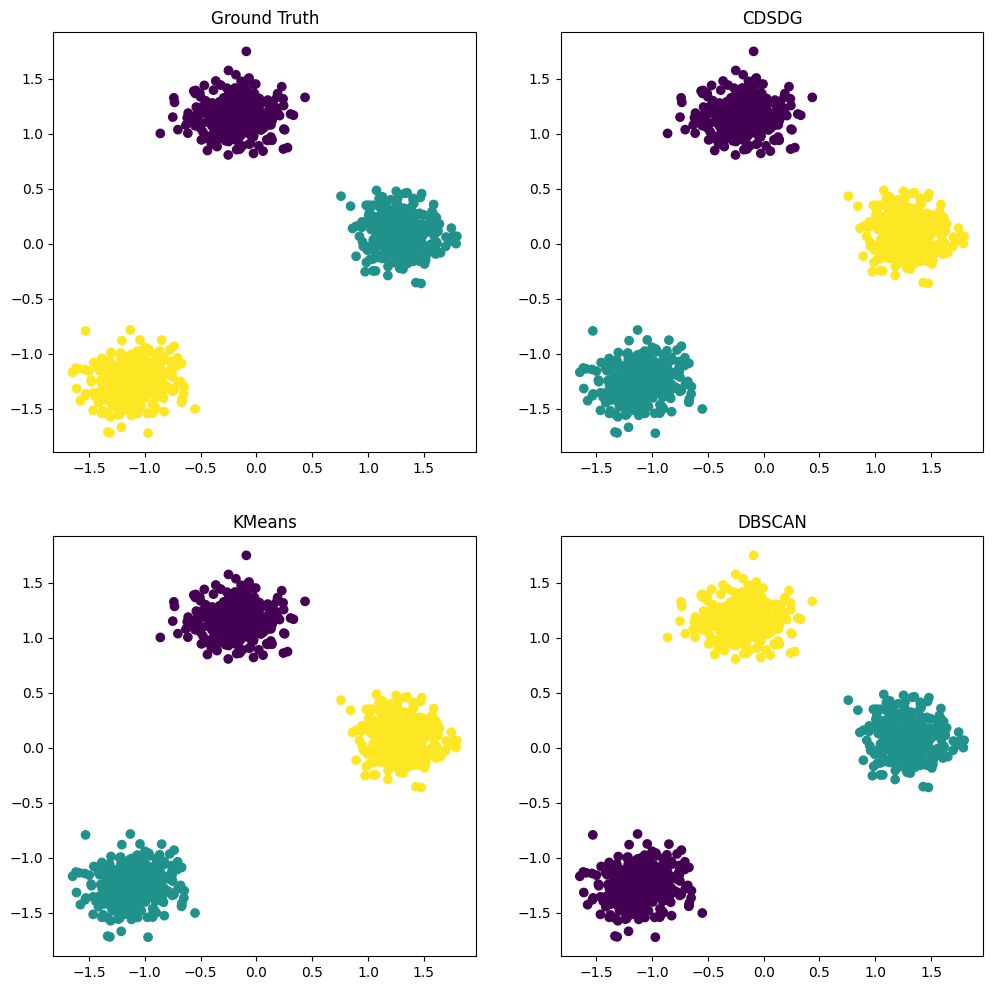

In [13]:
# Generate data
n_samples = 1000
n_features = 2
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

# Fit CDSDG
cdsgd = DSClustering(cluster=n_clusters, data=X,)
cdsgd.generate_categorical_rules()
y_pred = cdsgd.predict()
print(f'ARI: {adjusted_rand_score(y, y_pred)}')
print(y_pred)

# Fit KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred_kmeans = kmeans.fit_predict(X)
print(f'ARI: {adjusted_rand_score(y, y_pred_kmeans)}')
print(y_pred_kmeans)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.3)
y_pred_dbscan = dbscan.fit_predict(X)
print(f'ARI: {adjusted_rand_score(y, y_pred_dbscan)}')
print(y_pred_dbscan)

# Fit Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=n_clusters)
y_pred_agg = agg.fit_predict(X)
print(f'ARI: {adjusted_rand_score(y, y_pred_agg)}')
print(y_pred_agg)

# Plot results
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[0], X[1], c=y)
plt.title('Ground Truth')
plt.subplot(222)
plt.scatter(X[0], X[1], c=y_pred)
plt.title('CDSDG')
plt.subplot(223)
plt.scatter(X[0], X[1], c=y_pred_kmeans)
plt.title('KMeans')
plt.subplot(224)
plt.scatter(X[0], X[1], c=y_pred_dbscan)
plt.title('DBSCAN')
plt.show()


## Data Real